<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/linear_op_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autorch >log.txt

In [2]:
import pandas as pd
import joblib
import autorch
from torch import nn#
from torch.optim import Adam

# c620 模擬數據

  0%|          | 1/300 [00:00<00:59,  4.99it/s]

epoch:0 train_loss:0.0504 valid_loss:0.0148


 17%|█▋        | 52/300 [00:09<00:46,  5.38it/s]

epoch:50 train_loss:0.0006 valid_loss:0.0006


 34%|███▍      | 102/300 [00:19<00:36,  5.45it/s]

epoch:100 train_loss:0.0006 valid_loss:0.0006


 51%|█████     | 152/300 [00:28<00:27,  5.43it/s]

epoch:150 train_loss:0.0006 valid_loss:0.0006


 67%|██████▋   | 202/300 [00:37<00:18,  5.41it/s]

epoch:200 train_loss:0.0006 valid_loss:0.0006


 84%|████████▍ | 252/300 [00:47<00:08,  5.41it/s]

epoch:250 train_loss:0.0006 valid_loss:0.0006


100%|██████████| 300/300 [00:56<00:00,  5.35it/s]


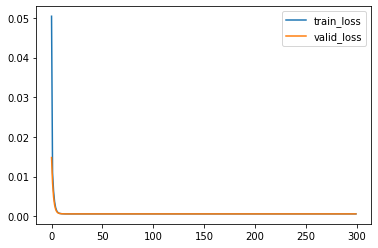

In [3]:
# load data
c620_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c620_train.csv',index_col=0)
c620_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c620_col_names.pkl')

# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c620_df_real[op_col].dropna(axis=1).columns.tolist()

# modeling
c620_op_model = autorch.utils.PartBulider(c620_df,x_col,op_col,limit_y_range=True)
c620_op_model.net = nn.Linear(len(x_col),len(op_col))
c620_op_model.optimizer = Adam(c620_op_model.net.parameters())
c620_op_model.train()

In [4]:
# test
c620_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Feed Properties,1,6.92106e-13,4.29631e-05
Density_Vent Gas Production Rate and Composition,0.968987,7.01797e-07,0.125773
Density_Distillate Production Rate and Composition,0.912277,9.17944e-06,0.275206
Density_Sidedraw Production Rate and Composition,0.999774,2.59369e-10,0.00137907
Density_Bottoms Production Rate and Composition,0.998636,2.25621e-11,0.000476714
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.992787,0.952217,0.608299
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.957618,0.0562718,0.124396
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0.996362,0.00289455,0.0224119
AVG,0.978305,0.126424,0.144748


In [5]:
import joblib
# save
joblib.dump(c620_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op.pkl']

# c620遷移學習

In [6]:
# use pretrain net continue training
from copy import deepcopy
pretrain_net = deepcopy(c620_op_model.net.train())
print(pretrain_net)

Linear(in_features=44, out_features=8, bias=True)


In [7]:
c620_op_model = autorch.utils.PartBulider(c620_df_real,x_col,op_col,limit_y_range=True) # use real data  
c620_op_model.net = pretrain_net # use pretrain net
c620_op_model.optimizer = Adam(c620_op_model.net.parameters())

 11%|█▏        | 34/300 [00:00<00:00, 332.38it/s]

epoch:0 train_loss:0.1030 valid_loss:0.0910


 22%|██▏       | 65/300 [00:00<00:00, 323.02it/s]

epoch:50 train_loss:0.0099 valid_loss:0.0124


 33%|███▎      | 100/300 [00:00<00:00, 329.23it/s]

epoch:100 train_loss:0.0074 valid_loss:0.0098


 44%|████▍     | 133/300 [00:00<00:00, 325.12it/s]

epoch:150 train_loss:0.0061 valid_loss:0.0084


 66%|██████▌   | 197/300 [00:00<00:00, 319.12it/s]

epoch:200 train_loss:0.0054 valid_loss:0.0075


 87%|████████▋ | 260/300 [00:00<00:00, 312.50it/s]

epoch:250 train_loss:0.0049 valid_loss:0.0070


100%|██████████| 300/300 [00:00<00:00, 315.33it/s]


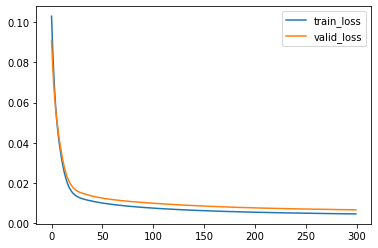

In [8]:
c620_op_model.train()

In [9]:
# test
c620_op_model.test(e=0.02)

,R2,MSE,MAPE
Density_Feed Properties,0,1.66249e-05,0.363113
Density_Vent Gas Production Rate and Composition,0,0.00155839,5.52802
Density_Distillate Production Rate and Composition,0.726885,5.17689e-06,0.211468
Density_Sidedraw Production Rate and Composition,0,8.71955e-06,0.204538
Density_Bottoms Production Rate and Composition,0.684454,3.1664e-07,0.0577827
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.628833,7.79485,2.15563
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0,5.92876,1.03358
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,0.683749,0.344262
AVG,0.255021,1.80112,1.2373


In [10]:
# save
joblib.dump(c620_op_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op_real_data.pkl']

# c660